In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

# for converting currency to int
from decimal import Decimal
from re import sub

In [2]:
#input_file = "data.csv"
input_file= os.path.join('Resources','data.csv')
data_df = pd.read_csv(input_file)

In [3]:
#total number of players
total_players=data_df['ID'].nunique()
total_players

18207

In [4]:
#data_df.isnull().sum()

In [5]:
#Dropping columns that are not used in the analysis and also the ones with lot of null values
new_df=data_df.drop([ 'Release Clause','Loaned From', 'Joined'], axis='columns')
new_df.drop(new_df.columns[26:52], axis=1, inplace=True)
new_df.head()
new_df['Age'].min()

16

In [6]:
new_df['Age'].max()

45

In [7]:
new_df.isnull().sum()
type(new_df)

pandas.core.frame.DataFrame

In [8]:
#new_df.dropna(axis = 0, how ='any', inplace = True)
new_df=new_df.dropna()
new_df.isnull().sum()
new_df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [9]:
# changing Wage to int
wage_value=[]

for wage in new_df['Wage']:
    string_val = sub(r'[^\d.]', '000', wage)
    wage_value.append(string_val)

new_df['Wage'] = wage_value
new_df['Wage'] = new_df['Wage'].astype(int)


In [10]:
print(new_df['Wage'].head())

0    565000
1    405000
2    290000
3    260000
4    355000
Name: Wage, dtype: int64


In [11]:
# 1. Create bins for player age groups and correlate with salary/wages
age_bins = [15, 20, 25, 30, 35,40,50]
age_groups = [",20", "21-25","26-30","31-35","36-40",">40"]

# purchase_data["Age Range"] = pd.cut(purchase_data["Age"],age_bins,labels = group_names)
# purchase_data.head()

In [12]:
#creating a new df
age_range_df = pd.DataFrame(new_df)
age_range_df['Age Range'] = pd.cut(age_range_df["Age"],age_bins,labels = age_groups)
age_range_df = age_range_df[['ID','Name','Age','Age Range','Wage','Value']]

age_range_df.head()

,ID,Name,Age,Age Range,Wage,Value
0,158023,L. Messi,31,31-35,565000,€110.5M
1,20801,Cristiano Ronaldo,33,31-35,405000,€77M
2,190871,Neymar Jr,26,26-30,290000,€118.5M
3,193080,De Gea,27,26-30,260000,€72M
4,192985,K. De Bruyne,27,26-30,355000,€102M


In [13]:
#grouping by age range 
age_analysis_df = pd.DataFrame(age_range_df.groupby(['Age Range']).count())

age_analysis_df['Total Wage'] = age_range_df.groupby(['Age Range'])[['Wage']].sum()
#age_analysis_df['Mean Value'] = age_range_df.
age_analysis_df



,ID,Name,Age,Wage,Value,Total Wage
Age Range,,,,,,
",20",3304,3304,3304,3304,3304,11006000
21-25,6666,6666,6666,6666,6666,59129000
26-30,5412,5412,5412,5412,5412,74777000
31-35,2247,2247,2247,2247,2247,30427000
36-40,281,281,281,281,281,1737000
>40,8,8,8,8,8,21000


In [14]:
age_analysis_df['Total Wage'].max()

74777000

In [15]:
age_analysis_df['Total Wage'].min()

21000

In [16]:
#age_analysis_df['Total Wage']

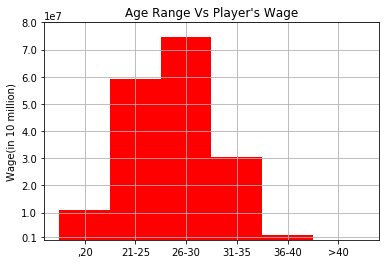

In [45]:
Age_player=age_analysis_df.index
Player_wage=age_analysis_df['Total Wage']
x_axis=np.arange(len(Age_player))
plt.bar(x_axis, Player_wage, color=('red'), align="center", width=-1)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Age_player)
plt.yticks([1000000,10000000,20000000,30000000,40000000,50000000,60000000,70000000,80000000])
plt.grid()

plt.title("Age Range Vs Player's Wage")
plt.ylabel('Wage(in 10 million)')
plt.savefig('Wage.png')



In [18]:
new_df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Age Range'],
      dtype='object')

In [19]:
type(new_df)

pandas.core.frame.DataFrame

In [20]:
sorted_overall=new_df.sort_values('Overall', ascending=False )
sorted_potential=new_df.sort_values('Potential', ascending=False)
sorted_age=new_df.sort_values('Age', ascending=False,)
#type(sorted_potential)
#len(sorted_potential)
sorted_overall.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Age Range
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,31-35
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,31-35
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,26-30
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,26-30
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,26-30


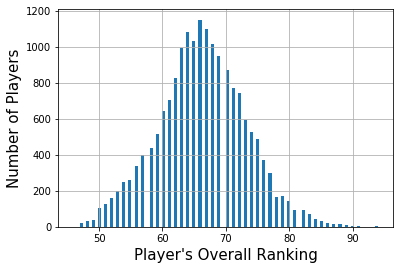

In [21]:
#histogram number of players and their overall ranking
sorted_overall['Overall'].hist(bins=100)
plt.xlabel("Player's Overall Ranking", fontsize=15)
plt.ylabel("Number of Players",fontsize=15)
plt.savefig('overall_ranking.png')

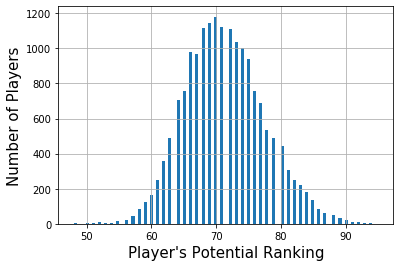

In [22]:
#histogram number of players and their potential ranking
sorted_potential['Potential'].hist(bins=100)
plt.xlabel("Player's Potential Ranking", fontsize=15)
plt.ylabel("Number of Players",fontsize=15)
plt.savefig('potential_ranking.png')

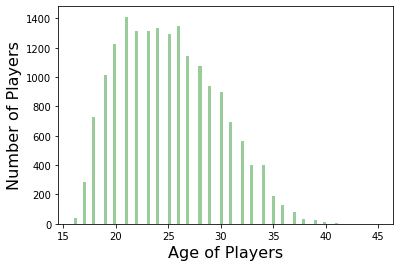

In [23]:
#Age distribution of the players
sns.distplot(sorted_age['Age'], kde=False, color='green', bins=100)
#plt.title("Player's Age", fontsize=18)
plt.xlabel('Age of Players', fontsize=16)
plt.ylabel('Number of Players', fontsize=16)
plt.savefig('age_distribution.png')

In [24]:
#creating a dictionary & new df to hold Megan and Messi's statistics
player_stat_data={'Name':['Megan', 'Messi'],
             'Matches_Played':[5,4],
             'Goals_Scored':[6,1],
             'Penalties_Scored':[3,0],
             'Assists': [3,2],
             'Corners':[16,2],
             'Shots_Blocked':[3,8],
             'Fouls_Commited':[4,4]}
player_stat2={'Name':['Megan', 'Messi'],
              'Minutes_Played':[428,360],
              'Distance_Coveredkm':[42.3, 31.6]}
player_info={'Name':['Megan', 'Messi'],
             'Age':[34,32],
             'Height':[167,170],
             'International_Captains':[158,136],
             'International_Goals':[50,65]}
player_salary={'Name':['Megan', 'Messi'],
              'Salary($)':[400000,44000000]}

In [25]:
player_stat_df = pd.DataFrame(player_stat_data) 
player_stat2=pd.DataFrame(player_stat2)
player_info_df=pd.DataFrame(player_info)
player_salary_df=pd.DataFrame(player_salary)

In [26]:
player_stat_df

,Name,Matches_Played,Goals_Scored,Penalties_Scored,Assists,Corners,Shots_Blocked,Fouls_Commited
0,Megan,5,6,3,3,16,3,4
1,Messi,4,1,0,2,2,8,4


In [27]:
#pivoting the table to make it easy to plot
pivot_stat_df = player_stat_df.pivot_table(columns='Name')
pivot_stat2 = player_stat2.pivot_table(columns='Name')
pivot_info_df = player_info_df.pivot_table(columns='Name')
pivot_salary_df = player_salary_df.pivot_table(columns='Name')
pivot_stat_df

Name,Megan,Messi
Assists,3,2
Corners,16,2
Fouls_Commited,4,4
Goals_Scored,6,1
Matches_Played,5,4
Penalties_Scored,3,0
Shots_Blocked,3,8


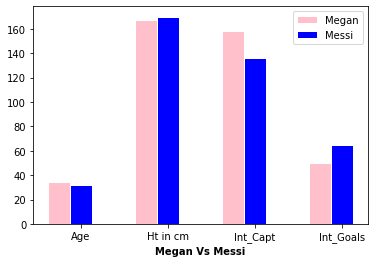

In [28]:
#barplot1
barWidth = 0.25
bars1=pivot_info_df['Megan']
bars2=pivot_info_df['Messi']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


plt.bar(r1, bars1, color='pink', width=barWidth, edgecolor='white', label='Megan')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Messi')

plt.xlabel('Megan Vs Messi', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Age','Ht in cm','Int_Capt','Int_Goals'])

plt.legend()
plt.savefig('Megan_Messi.png')
plt.show()



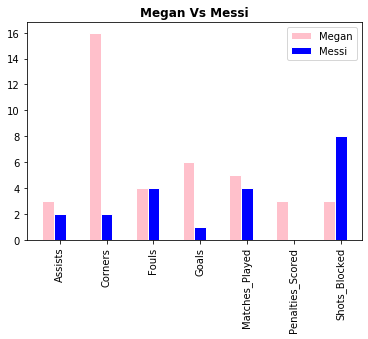

In [29]:
#barplot 2
barWidth = 0.25
bars1=pivot_stat_df['Megan']
bars2=pivot_stat_df['Messi']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


plt.bar(r1, bars1, color='pink', width=barWidth, edgecolor='white', label='Megan')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Messi')

plt.title('Megan Vs Messi', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Assists','Corners','Fouls', 'Goals', 'Matches_Played', 'Penalties_Scored', 'Shots_Blocked'], rotation='vertical')

plt.legend()
plt.savefig('Megan_Messi2.png')
plt.show()



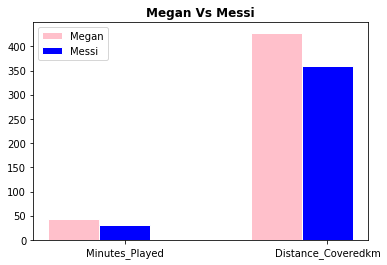

In [30]:
#barplot 3
barWidth = 0.25
bars1=pivot_stat2['Megan']
bars2=pivot_stat2['Messi']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


plt.bar(r1, bars1, color='pink', width=barWidth, edgecolor='white', label='Megan')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Messi')

plt.title('Megan Vs Messi', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Minutes_Played', 'Distance_Coveredkm'])

plt.legend()
plt.savefig('Megan_Messi3.png')
plt.show()


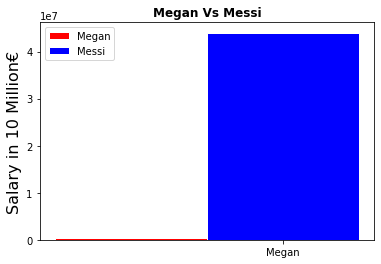

In [31]:
#barplot 4
barWidth = 0.25
bars1=pivot_salary_df['Megan']
bars2=pivot_salary_df['Messi']

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Megan')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Messi')

plt.title('Megan Vs Messi', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Megan', 'Messi'])
plt.ylabel('Salary in 10 Million€', fontsize=16)

plt.legend()
plt.savefig('Megan_Messi4.png')
plt.show()


In [32]:
top11_overall=sorted_overall.iloc[0:11]
top11_overall.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Age Range'],
      dtype='object')

In [33]:
#taking top 11 players based on overall ranking and creating a list of 11 skills of those players
skill_df=top11_overall.loc[ :,'Crossing':'SprintSpeed']
skill_df['Name']=top11_overall.loc[ :, 'Name']
col_name=skill_df.columns
crossing=list(skill_df.Crossing.values)
finishing=list(skill_df.Finishing.values)
heading_accuracy=list(skill_df.HeadingAccuracy.values)
shortpassing=list(skill_df.ShortPassing.values)
volleys=list(skill_df.Volleys.values)
curve=list(skill_df.Curve.values)
fkaccuracy=list(skill_df.FKAccuracy.values)
longpassing=list(skill_df.LongPassing.values)
ballcontrol=list(skill_df.BallControl.values)
acceleration=list(skill_df.Acceleration.values)
sprintspeed=list(skill_df.SprintSpeed.values)


In [34]:
player_name=list(skill_df.Name.values)
player_name

['L. Messi',
 'Cristiano Ronaldo',
 'Neymar Jr',
 'De Gea',
 'K. De Bruyne',
 'E. Hazard',
 'L. Modrić',
 'L. Suárez',
 'Sergio Ramos',
 'D. Godín',
 'David Silva']

In [35]:
skill_stats=np.array([crossing,finishing,heading_accuracy, shortpassing,volleys, curve,fkaccuracy,longpassing,ballcontrol,acceleration,sprintspeed])            
skill_stats

array([[84., 84., 79., 17., 93., 81., 86., 77., 66., 55., 84.],
       [95., 94., 87., 13., 82., 84., 72., 93., 60., 42., 76.],
       [70., 89., 62., 21., 55., 61., 55., 77., 91., 92., 54.],
       [90., 81., 84., 50., 92., 89., 93., 82., 78., 79., 93.],
       [86., 87., 84., 13., 82., 80., 76., 88., 66., 47., 82.],
       [93., 81., 88., 21., 85., 83., 85., 86., 74., 49., 82.],
       [94., 76., 87., 19., 83., 79., 78., 84., 72., 51., 77.],
       [87., 77., 78., 51., 91., 83., 88., 64., 77., 70., 87.],
       [96., 94., 95., 42., 91., 94., 93., 90., 84., 76., 94.],
       [91., 89., 94., 57., 78., 94., 80., 86., 76., 68., 70.],
       [86., 91., 90., 58., 76., 88., 72., 75., 75., 68., 64.]])

In [36]:
len(player_name)

11

In [37]:
#col_name.reset_index()
len(skill_stats)

11

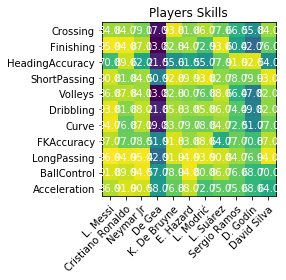

In [47]:
#heat map
fig, ax = plt.subplots()
im = ax.imshow(skill_stats)

# We want to show all ticks...
ax.set_xticks(np.arange(len(player_name)))
ax.set_yticks(np.arange(len(skill_stats)))
# ... and label them with the respective list entries
ax.set_xticklabels(player_name)
ax.set_yticklabels(col_name)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(skill_stats)):
    for j in range(len(player_name)):
        text = ax.text(j, i, skill_stats[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Players Skills")
fig.tight_layout()
plt.savefig('skills.png')
plt.show()



